## **Project Description** 
Gemstone co ltd, which is a manufacturer of cubic zirconia, relies on this analysis to predict the price of the gemstone based on the details provided in the `Metadata` dataset so that it can distinguish between the most profitable gemstones and the least profitable gemstones to have a better share of the profits.
This dataset contains the price and other attributes of nearly 27,000 cubic zirconias (a cheap diamond alternative with many qualities identical to a diamond). The company makes different profits on different slots.


### **Metadata**
1.  Carat : 	 Carat weight of the cubic zirconia.
2. Cut :	 Describe the cut quality of the cubic zirconia. Quality is increasing order:
    *  2.1 Fair
    *  2.2 Good
    *  2.3 Very Good
    *  2.4 Premium
    *  2.5 Ideal
3. Color :  	 Color of the cubic zirconia with D being the best and J the worst.
4. Clarity :	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. from Best to Worst:
    * FL: Flawless
    * IF: Internally Flawless
    * VVS1: Very, Very Slightly Included 1
    * VVS2: Very, Very Slightly Included 2
    * VS1: Very Slightly Included 1
    * VS2: Very Slightly Included 2
    * SI1: Slightly Included 1
    * SI2: Slightly Included 2
    * I1: Included 1
    * I2: Included 2
    * I3: Included 3
5. Depth : The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. Table : The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. Price : The Price of the cubic zirconia.
8. Lenght(mm) :	Length of the cubic zirconia in mm.
9. Width(mm) :	Width of the cubic zirconia in mm.
10. Height(mm) : Height of the cubic zirconia in mm.

## **1- Import libraries and dataset**

In [1]:
#import needed pakages and libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
zirconia=pd.read_csv('Nov-21_cubic_zirconia.csv')
zirconia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## **2-Preproccessing**
### **2-1-CLeanning data**

In [3]:
#Check and informed about dataset
zirconia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26957 non-null  float64
 2   cut         26962 non-null  object 
 3   color       26964 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26266 non-null  float64
 6   table       26961 non-null  float64
 7   x           26960 non-null  float64
 8   y           26957 non-null  float64
 9   z           26959 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
df=zirconia.copy()
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


In [5]:
#Drop the "unnamed: 0" column because no information is inferred from this property.
df.drop(columns=['Unnamed: 0'],  inplace=True)
df.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


In [6]:
#Rename the column names
new_col_name= ['Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'Lenght(mm)', 'Width(mm)', 'Height(mm)', 'Price']
df.columns=new_col_name
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Lenght(mm),Width(mm),Height(mm),Price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
#Check for duplicates
#Count duplicate rows in the entire DataFrame
duplicates= df.duplicated()
any_duplicates= duplicates.any()
count_duplicate = duplicates.sum()
print(f'Are there any duplicates? {any_duplicates}, {count_duplicate} observations are duplicate.')

Are there any duplicates? True, 34 observations are duplicate.


In [8]:
#See duplicates in DataFrame format
all_duplicates=df.duplicated(keep=False)
all_duplicates_rows=df[all_duplicates]
all_duplicates_rows

,Carat,Cut,Color,Clarity,Depth,Table,Lenght(mm),Width(mm),Height(mm),Price
106,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
423,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
1996,1.50,Premium,F,SI2,58.5,60.0,7.52,7.48,4.39,7644
2007,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
2155,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
...,...,...,...,...,...,...,...,...,...,...
25268,1.20,Premium,I,VS2,62.6,58.0,6.77,6.72,4.22,5699
25759,0.30,Ideal,G,IF,62.1,55.0,4.32,4.35,2.69,863
25941,0.51,Premium,F,SI2,58.1,59.0,5.26,5.24,3.05,1052
26191,2.54,Very Good,H,SI2,63.5,56.0,8.68,8.65,5.50,16353


In [9]:
df_dup=df.drop_duplicates()
print(df.shape, df_dup.shape)

(26967, 10) (26933, 10)


### **2-2-Handeling missing values**

In [10]:
#Count and percentage of missing values
missing=pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis=1)
missing.columns=['MissingCount', 'MissingPercentage']
missing.sort_values(by='MissingCount')
missing

,MissingCount,MissingPercentage
Carat,10,0.037082
Cut,5,0.018541
Color,3,0.011125
Clarity,0,0.000000
Depth,701,2.599473
Table,6,0.022249
Lenght(mm),7,0.025958
Width(mm),10,0.037082
Height(mm),8,0.029666
Price,0,0.000000


### **Missing values**
 - A) **Numericla Features**
    - Carat 10 missing
    - Depth 701 misssing
    - Table 6 missing
    - Lenght(mm) 7 missing
    - Width(mm) 10 missing
    - Height(mm) 8 missing
 - B) **Categorical Features**
    - Cut 5 missing
    - Color 3 missing

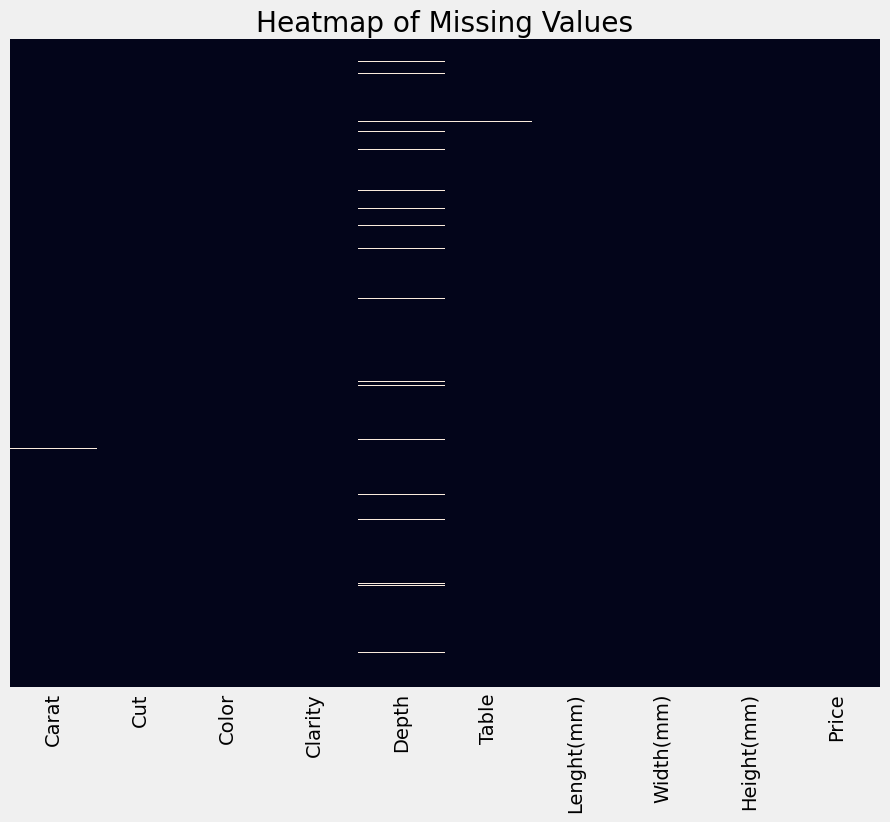

In [11]:
# Ceck if there is any relation among missing values
missing_values = df.isnull()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(missing_values, cbar=False, yticklabels=False) 
plt.title('Heatmap of Missing Values')
plt.show()

### **Insight**
- There isn't any relationship for missing data among features. depth has some missing value we can drop them.

In [12]:
#Drop missing values of depth feature
df.dropna(subset=['Depth'], inplace=True)
df.shape

(26266, 10)

#### Numerical missing values are filled with median 

In [13]:
df['Lenght(mm)']=df['Lenght(mm)'].fillna(df['Lenght(mm)'].median())
df['Width(mm)']=df['Width(mm)'].fillna(df['Width(mm)'].median())
df['Height(mm)']=df['Height(mm)'].fillna(df['Height(mm)'].median())
df['Table']=df['Table'].fillna(df['Table'].median())
df['Carat']=df['Carat'].fillna(df['Carat'].median())

### Fill categorical null value based on the price range

In [14]:
#Check null data in dataframe format
cut_null = df[df['Cut'].isnull()]
cut_null

,Carat,Cut,Color,Clarity,Depth,Table,Lenght(mm),Width(mm),Height(mm),Price
3280,0.90,NaN,NaN,SI2,62.8,54.0,6.05,6.15,3.83,3217
3281,0.90,NaN,NaN,SI1,60.7,57.0,6.21,6.25,3.78,4401
3282,0.34,NaN,NaN,VVS1,62.2,56.0,4.44,4.46,2.77,1014
11683,0.35,NaN,E,VS2,62.1,59.0,4.49,4.46,2.78,984
20206,1.01,NaN,H,SI1,63.1,59.0,5.69,6.43,4.03,4705


In [15]:
#Fill null data based on the price range,
# fill Cut missing values
# if price < 1000$==> Fair,                 if 1000$ < price <= 3000$ ==> Good  
# if 3000$ < price <= 4000$ ==> Very Good    if 4000$ < price <= 4500$ ==> Premium    if 4500$ < price ==> Ideal
df.loc[11683, 'Cut']= 'Fair'
df.loc[3282, 'Cut']= 'Good'
df.loc[3280, 'Cut']= 'Very Good'
df.loc[3281, 'Cut']= 'Premium'
df.loc[20206, 'Cut']= 'Ideal'

# fill Color missing values 
df.loc[3281, 'Color']= 'Good'
df.loc[3280, 'Color']= 'Excellent'
df.loc[3282, 'Color']= 'Fair'


In [16]:
#count and percentage of missing values
missing=pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis=1)
missing.columns=['MissingCount', 'MissingPercentage']
missing.sort_values(by='MissingCount')
missing

,MissingCount,MissingPercentage
Carat,0,0.0
Cut,0,0.0
Color,0,0.0
Clarity,0,0.0
Depth,0,0.0
Table,0,0.0
Lenght(mm),0,0.0
Width(mm),0,0.0
Height(mm),0,0.0
Price,0,0.0


## **There is no missing value in the dataset**

## **3-Exploratory Data Analysis(EDA)**
   - **3-1-Visaulizations**
       - ### To prepare charts to have better understanding of features, Clarity and Color abbreviations were replaced

In [17]:
df['Clarity'][df['Clarity'] == 'FL'] = 'Flawless-FL'
df['Clarity'][df['Clarity'] == 'IF'] = 'Flawless-IF'
df['Clarity'][df['Clarity'] == 'VVS1'] = 'VHQ-VVS1'
df['Clarity'][df['Clarity'] == 'VVS2'] = 'VHQ-VVS2'
df['Clarity'][df['Clarity'] == 'VS1'] = 'HQ-VS1'
df['Clarity'][df['Clarity'] == 'VS2'] = 'HQ-VS2'
df['Clarity'][df['Clarity'] == 'SI1'] = 'GQ-SI1'
df['Clarity'][df['Clarity'] == 'SI2'] = 'GQ-SI2'
df['Clarity'][df['Clarity'] == 'I1'] = 'LQ-I1'
df['Clarity'][df['Clarity'] == 'I2'] = 'LQ-I2'
df['Clarity'][df['Clarity'] == 'I3'] = 'LQ-I3'

In [18]:
df['Color'][df['Color'] == 'D'] = 'Best'
df['Color'][df['Color'] == 'E'] = 'Excellent'
df['Color'][df['Color'] == 'F'] = 'Fair'
df['Color'][df['Color'] == 'G'] = 'Good'
df['Color'][df['Color'] == 'H'] = 'Aevrage'
df['Color'][df['Color'] == 'I'] = 'Poor'
df['Color'][df['Color'] == 'J'] = 'Worst'

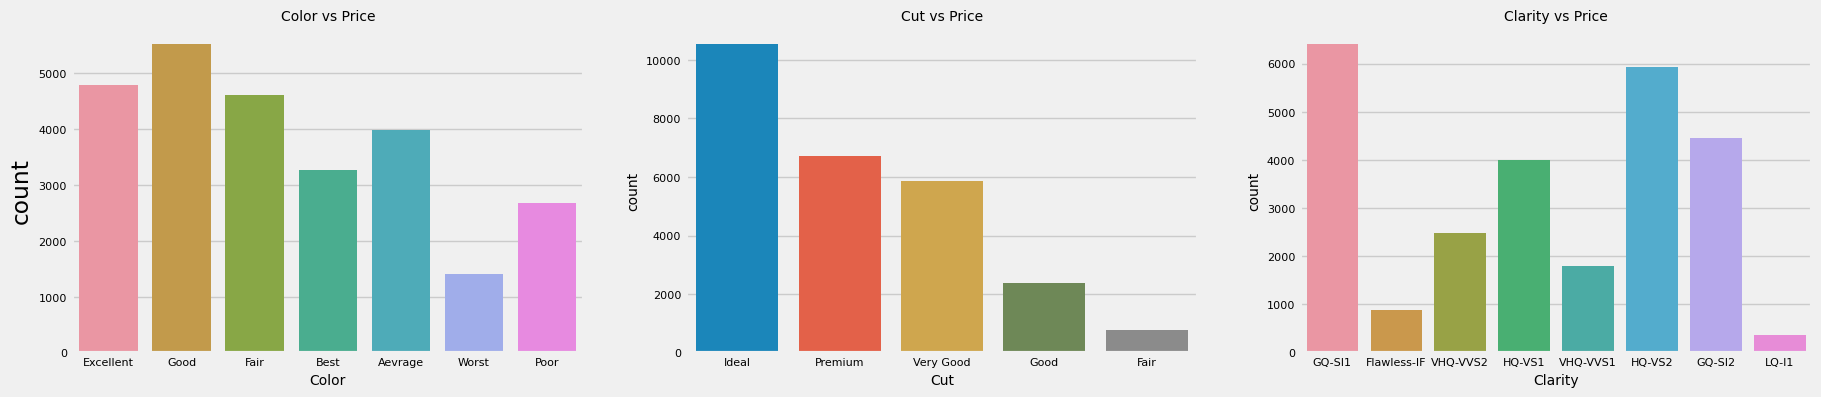

In [19]:
# Count plot of Categorical features
f,ax= plt.subplots(1,3,figsize=(20,4))

ax[0].set_title('Color vs Price', fontsize=10)
ax[0].set_xlabel('Color', fontsize=10)
ax[0].tick_params(axis = 'y', labelsize = 8)
ax[0].tick_params(axis = 'x', labelsize = 8)
sns.countplot(x= 'Color', data=df, ax=ax[0])

sns.countplot(x= 'Cut', data=df, ax=ax[1])
ax[1].set_title('Cut vs Price', fontsize=10)
ax[1].set_xlabel('Cut', fontsize=10)
ax[1].set_ylabel('count', fontsize=10)
ax[1].tick_params(axis = 'y', labelsize = 8)
ax[1].tick_params(axis = 'x', labelsize = 8)

sns.countplot(x= 'Clarity', data=df, ax=ax[2])
ax[2].set_title('Clarity vs Price', fontsize=10)
ax[2].set_xlabel('Clarity', fontsize=10)
ax[2].set_ylabel('count', fontsize=10)
ax[2].tick_params(axis = 'y', labelsize = 8)
ax[2].tick_params(axis = 'x', labelsize = 8)
plt.show()

## **Insights**
- Crystals with Ideal-Premium-very Good cut and Excellent-Good-fair color and clarity with SI1, VS2, SI2 have dominant frequency respectively.
- Good-fair cut and poor and worst grade color and Flawless-If, and LQ-l1 clarity have lowest frequency.

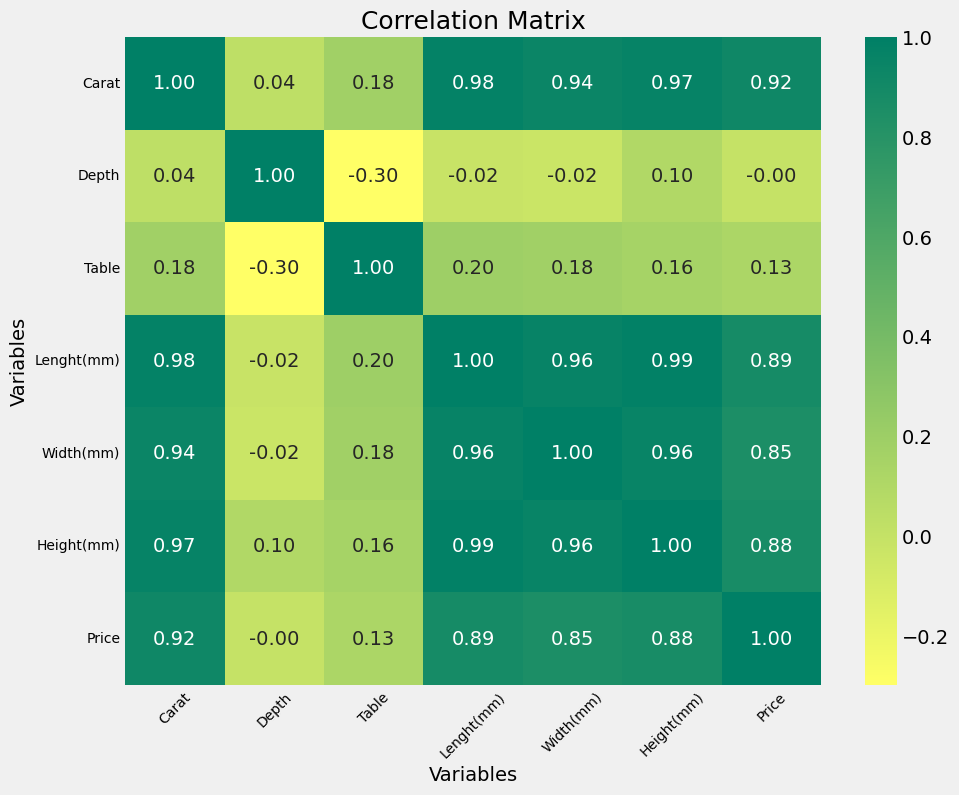

In [20]:
# Investigating Correlation
numerical_df= df.select_dtypes(include=['float', 'int'])
corr = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='summer_r', annot=True, fmt=".2f")
plt.title('Correlation Matrix', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)

plt.show()

### Insights of relation among variables and Price:
 1. Carat with 0.92 , Lenght(mm) with 0.89 , Height(mm) with 0.88  and Width(mm) with 0.85  show strong relation whit Price respectively.These are effective features to change price value.
 2. Depth :	shows no relation with price.
 3. Table :	shows low relation with price.
- Depth and Table will be removed from modeling features. 
    

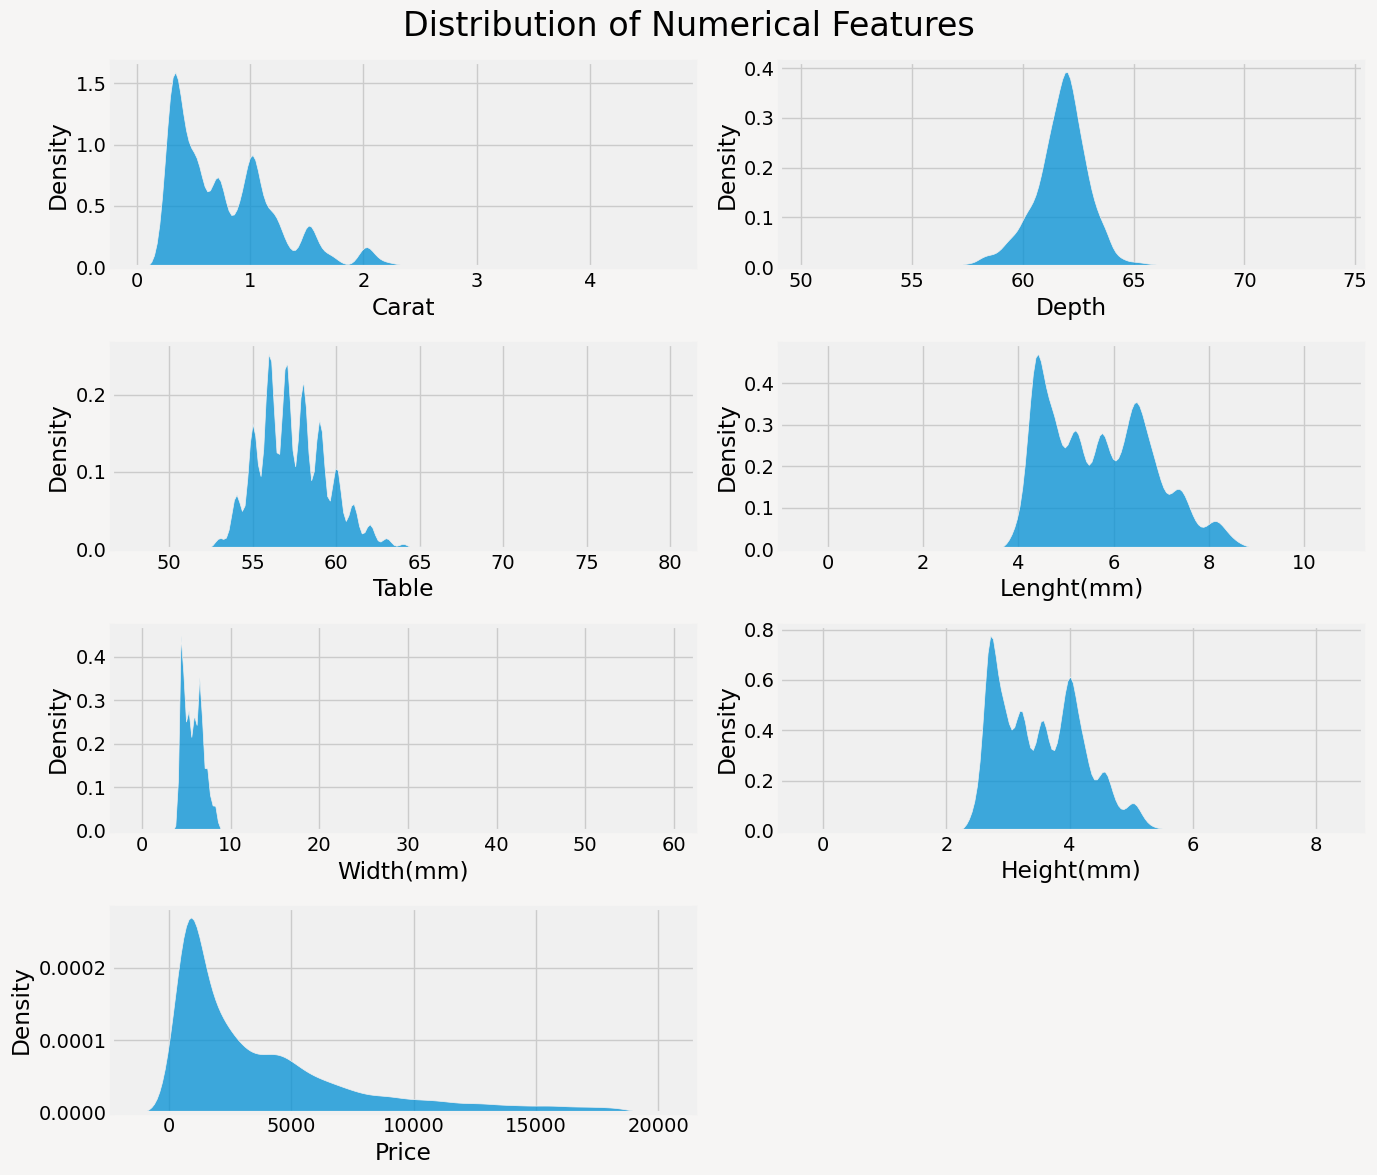

In [21]:
# Define your color palette
mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
# prepare some distribution chart by features we categorized in numerical, bi and nominal
feats = ['Carat', 'Depth', 'Table', 'Lenght(mm)', 'Width(mm)', 'Height(mm)', 'Price']
L = len(feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(14, 12), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, col in enumerate(feats):
    
        # Use KDE plot for all numerical features except 'num_major_vessels'
        sns.kdeplot(data=df, x=col, multiple='stack', palette=mypal[1::4], ax=axs[i])
        for p in axs[i].patches:
            height = p.get_height()
            axs[i].text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), ha='center',
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

            axs[i].set_xlabel(col, fontsize=20)
    
            axs[i].set_ylabel('Density' if col != 'Price' else 'Count', fontsize=20)
            sns.despine(right=True, ax=axs[i])

# Remove any unused axes if num_feats is odd
if L % 2 != 0:
    fig.delaxes(axs[-1])

plt.suptitle('Distribution of Numerical Features', fontsize=24)
plt.tight_layout()
plt.show()

## Insight for finding trend of distribution in every feature
   - Except Carat and Price that show skwness to the right the rest features show almost normal distribution.

### **3-2-Finding Outliers through visualization**

In [30]:
#Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat,26266.0,0.798000,0.477195,0.2,0.40,0.70,1.0500,4.50
Depth,26266.0,61.745062,1.412884,50.8,61.00,61.80,62.5000,73.60
Table,26266.0,57.456080,2.230478,49.0,56.00,57.00,59.0000,79.00
Lenght(mm),26266.0,5.729076,1.127451,0.0,4.71,5.69,6.5475,10.23
Width(mm),26266.0,5.732855,1.166086,0.0,4.72,5.70,6.5400,58.90
Height(mm),26266.0,3.536541,0.699226,0.0,2.90,3.52,4.0400,8.06
Price,26266.0,3937.742519,4022.149158,326.0,945.00,2375.00,5361.0000,18818.00


In [36]:
#Summary statistics for categorical columns

categorical_summary = df.describe(include=['object']).T
categorical_summary

,count,unique,top,freq
Cut,26266,5,Ideal,10542
Color,26266,7,Good,5528
Clarity,26266,8,GQ-SI1,6407


## Histograms, scatter plots for deeper data analysis and outlier detection

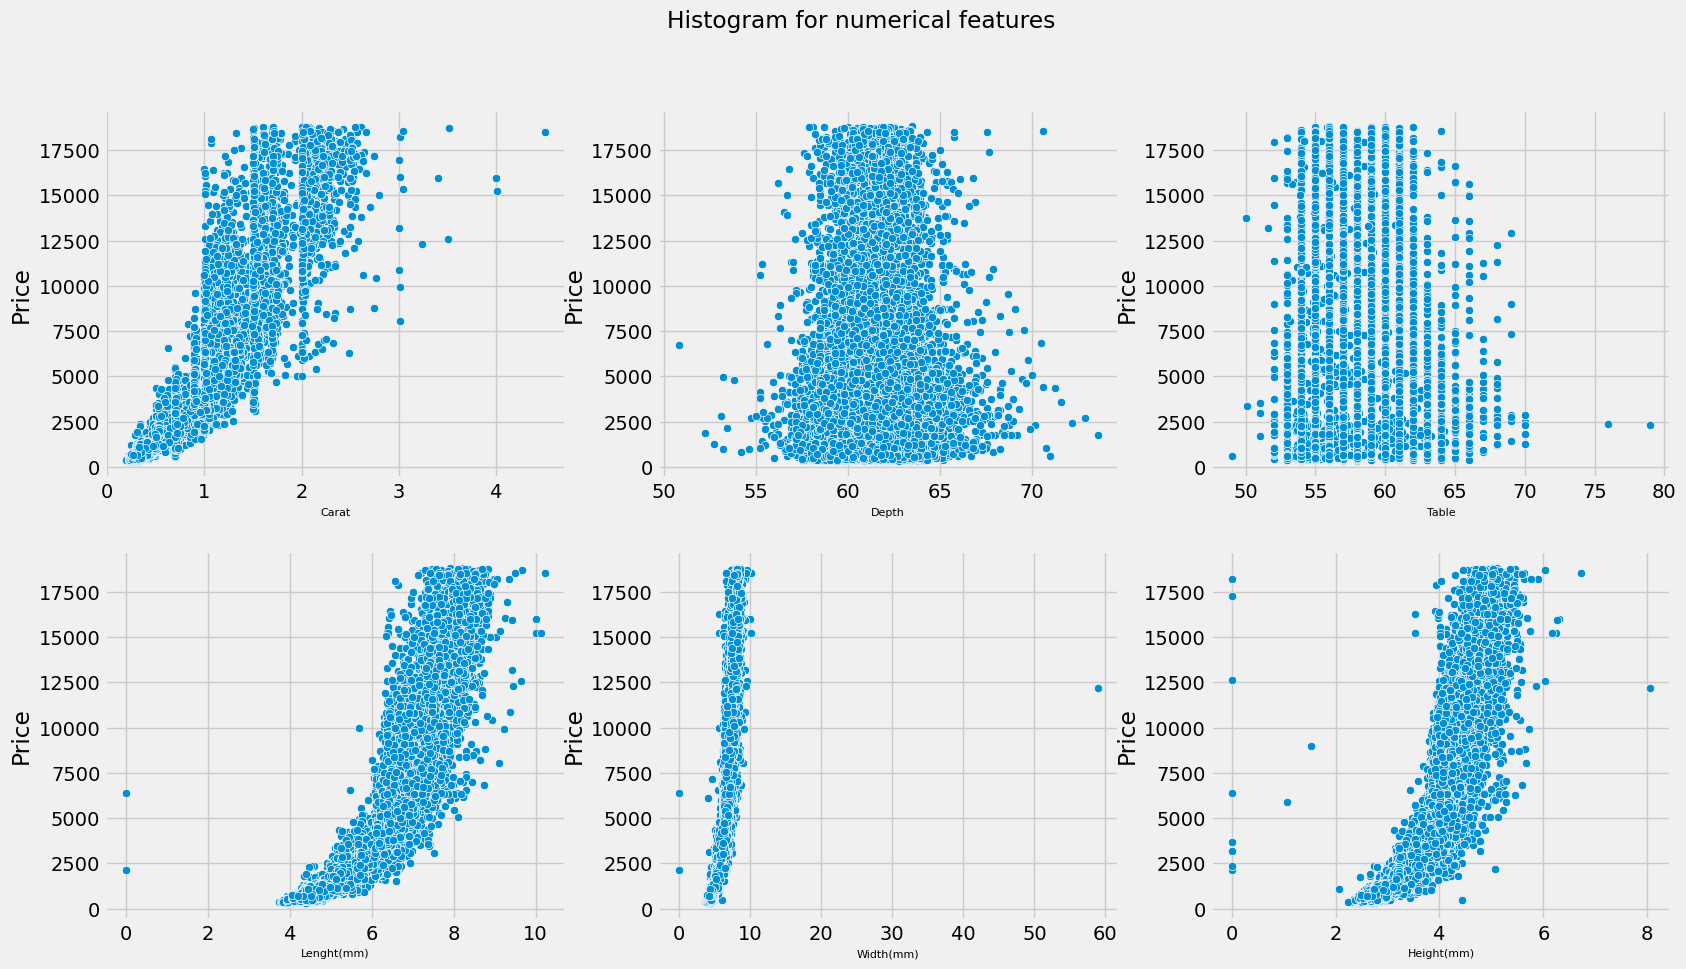

In [37]:
f,ax=plt.subplots(2,3,figsize=(18,10))
plt.suptitle('Histogram for numerical features')

sns.scatterplot(data=df, x='Carat', y= 'Price', ax=ax[0,0])
ax[0,0].set_xlabel('Carat', fontsize=8)

sns.scatterplot(data=df, x='Depth', y= 'Price', ax=ax[0,1])
ax[0,1].set_xlabel('Depth', fontsize=8)

sns.scatterplot(data=df, x='Table',y= 'Price', ax=ax[0,2] )
ax[0,2].set_xlabel('Table', fontsize=8)


sns.scatterplot(data=df, x='Lenght(mm)', y ='Price', ax=ax[1,0])
ax[1,0].set_xlabel('Lenght(mm)', fontsize=8)

sns.scatterplot(data=df, x='Width(mm)', y= 'Price', ax=ax[1,1])
ax[1,1].set_xlabel('Width(mm)', fontsize=8)

sns.scatterplot(data=df, x='Height(mm)', y= 'Price' , ax=ax[1,2])
ax[1,2].set_xlabel('Height(mm)', fontsize=8)

plt.show()

### **Insight for finding relation between features and target, also outliers by Scatterplot**
- Except Depth and Table that show no significant realtionships with pricew, Carat, lenght, width and height show linear relationships with price.
- Very few samples in the 'Carat', 'Length(mm)', 'Width(mm)', and 'Height(mm)' features show deviations from the overall pattern. The plots of all these features do not show any significant outliers.

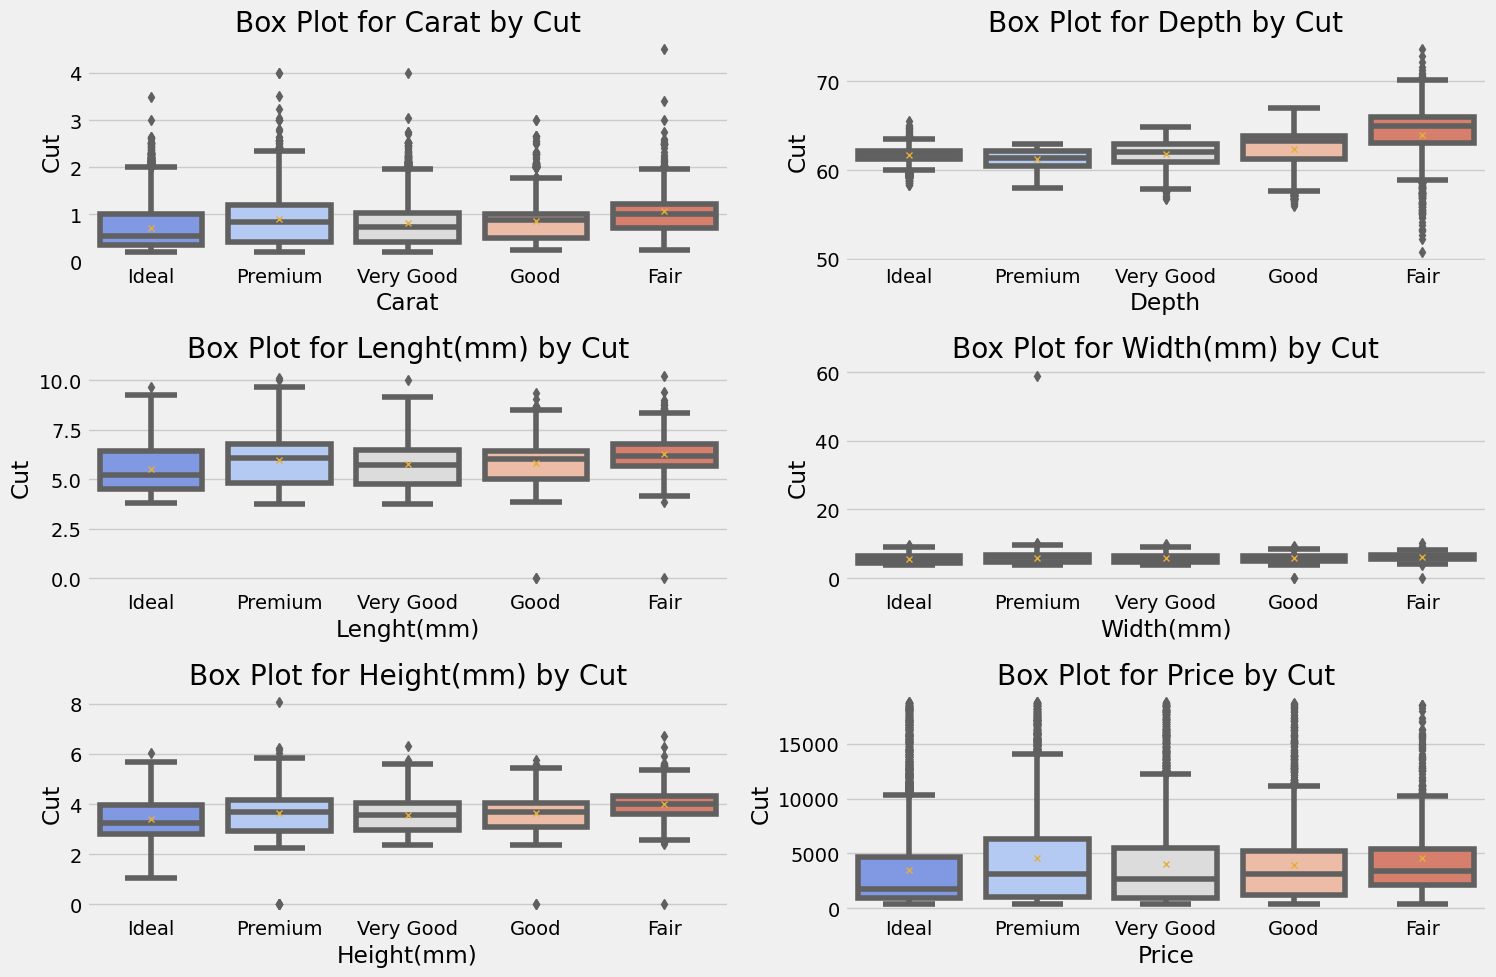

In [38]:
plt.figure(figsize=(15, 10))
features = ['Carat', 'Depth',  'Lenght(mm)', 'Width(mm)', 'Height(mm)', 'Price']
# Creating a box plot for each numerical variable with a hue based on sex
for i, variable in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=variable, x='Cut', data=df, palette="coolwarm", orient='v',
                 showmeans=True, meanprops={"marker":"x", "markerfacecolor":"red", "markeredgewidth":1, "markersize":4})
    plt.title(f'Box Plot for {variable} by Cut')
    plt.xlabel(variable)
    plt.ylabel('Cut')

# Adjusting the layout for better readability
plt.tight_layout()
plt.show()


#### **Insights of Box Plot for Cut vs num-variables**:
1. Carat:
- The carat increases as cut grade decreases.
- Zircons with Ideal cut shows lower carat values, but greater spread IQR.
2. Depth:
- Depth increases as cut grade decreases.
- However Ideal cut shows narrow spread IQR, keeps its median higher rather than other classes.
3. Lenght(mm):
- Crystals with lower cut grade tend to have higher Lenght values (larger sizes).
- While higher grade cuts keep IQR more spread than loewr grades.
4. Width(mm):
- in each class IQR shows the same spread and the same lenght.
5. Height(mm):
- Crystals with lower cut grades (Fair and Good) show higher Height values, similar to Lenght.
- Higher cut grades have wider range of Height values, greater IQR.
6. Price:
- High grade cut has higher price and wider range.
7. General Observations:
- Cut vs. Size (Carat, Lenght, Width, Height): zircons with lower cut grades tend to be larger value, while higher grade cut have wider IQR.
- Cut vs. Price: shows significant variation in IQR, spread and outliers.
- Outliers: All features outliers, indicating some zircons deviate significantly from typical trends in their respective cut groups.

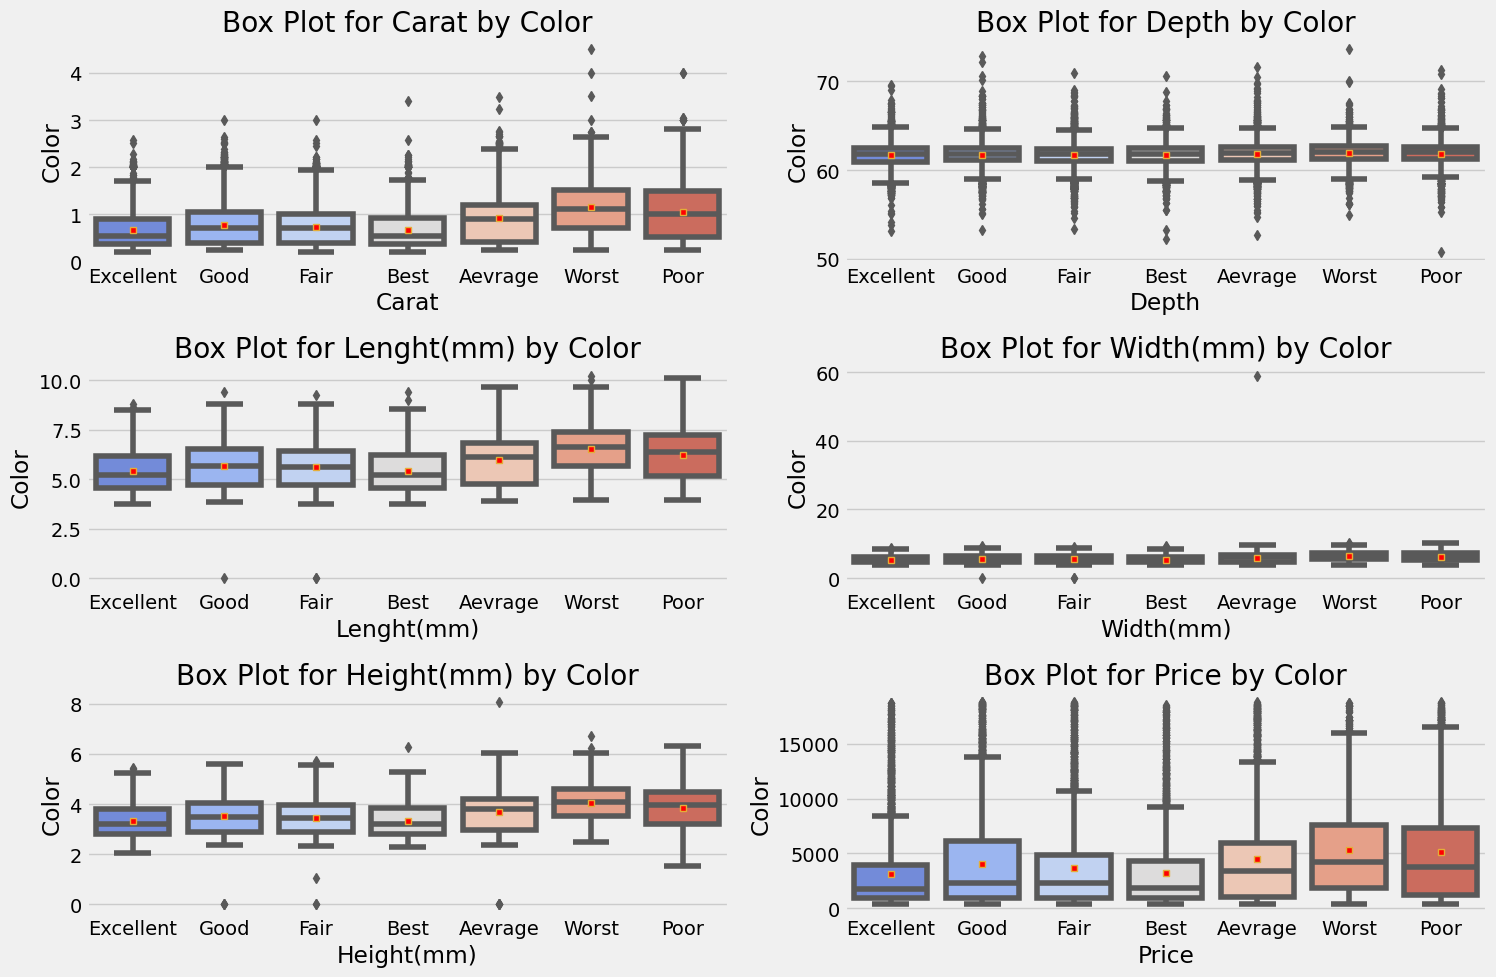

In [39]:
plt.figure(figsize=(15, 10))
features = ['Carat', 'Depth',  'Lenght(mm)', 'Width(mm)', 'Height(mm)',  'Price']
# Creating a box plot for each numerical variable with a hue based on sex
for i, variable in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=variable, x='Color', data=df, palette="coolwarm", orient='v',
                 showmeans=True, meanprops={"marker":"s", "markerfacecolor":"red", "markeredgewidth":1, "markersize":4}) #"marker": "o": The marker shape. You can use other shapes like "x", "D" (diamond), or "s" (square).
    plt.title(f'Box Plot for {variable} by Color')
    plt.xlabel(variable)
    plt.ylabel('Color')

# Adjusting the layout for better readability
plt.tight_layout()
plt.show()


#### **Overview of Box Plot for Color vs num-variables**:
1. Carat:
- The carat weight increases as color grade decreases.
- Zircons with color Excellent and Best grades tend to have lower carat values, whereas those with lower color grades show higher carat values.
2. Depth:
- Depth shows consistent distributions across color grades, with overlapping interquartile ranges (IQRs).
- Median depth values are fairly similar, also outliers are present for every color grade.
3. Lenght(mm):
- Crystals with lower color grade tend to have higher lenght values (larger sizes).
- While Excellent and Best grades crytals have a smaller range of lenght values, indicating that they are typically smaller in length.
4. Width(mm):
- Similar to lenght, crystals with lower color grades show a broader range of width values.
- Although the zircons represent small widths for every color.
5. Height(mm):
- Crystals with lower color grades show higher height values, similar to lenght.
- Higher color grades have a narrower range of height values.
6. Price:
- Excellent and Best color have narrower price range.
- Lower grades have a wider price range, with some outliers reaching high price points likely due to size or carat weight.
7. General Observations:
- Color vs. Size (Carat, Lenght(mm), Width(mm), Height(mm)): zircons with lower color grades tend to be larger, while higher grade color crystals are smaller.
- Color vs. Price: shows significant variation in IQR, spread and outliers.
- Outliers: All features outliers, indicating some zircons deviate significantly from typical trends in their respective color groups.

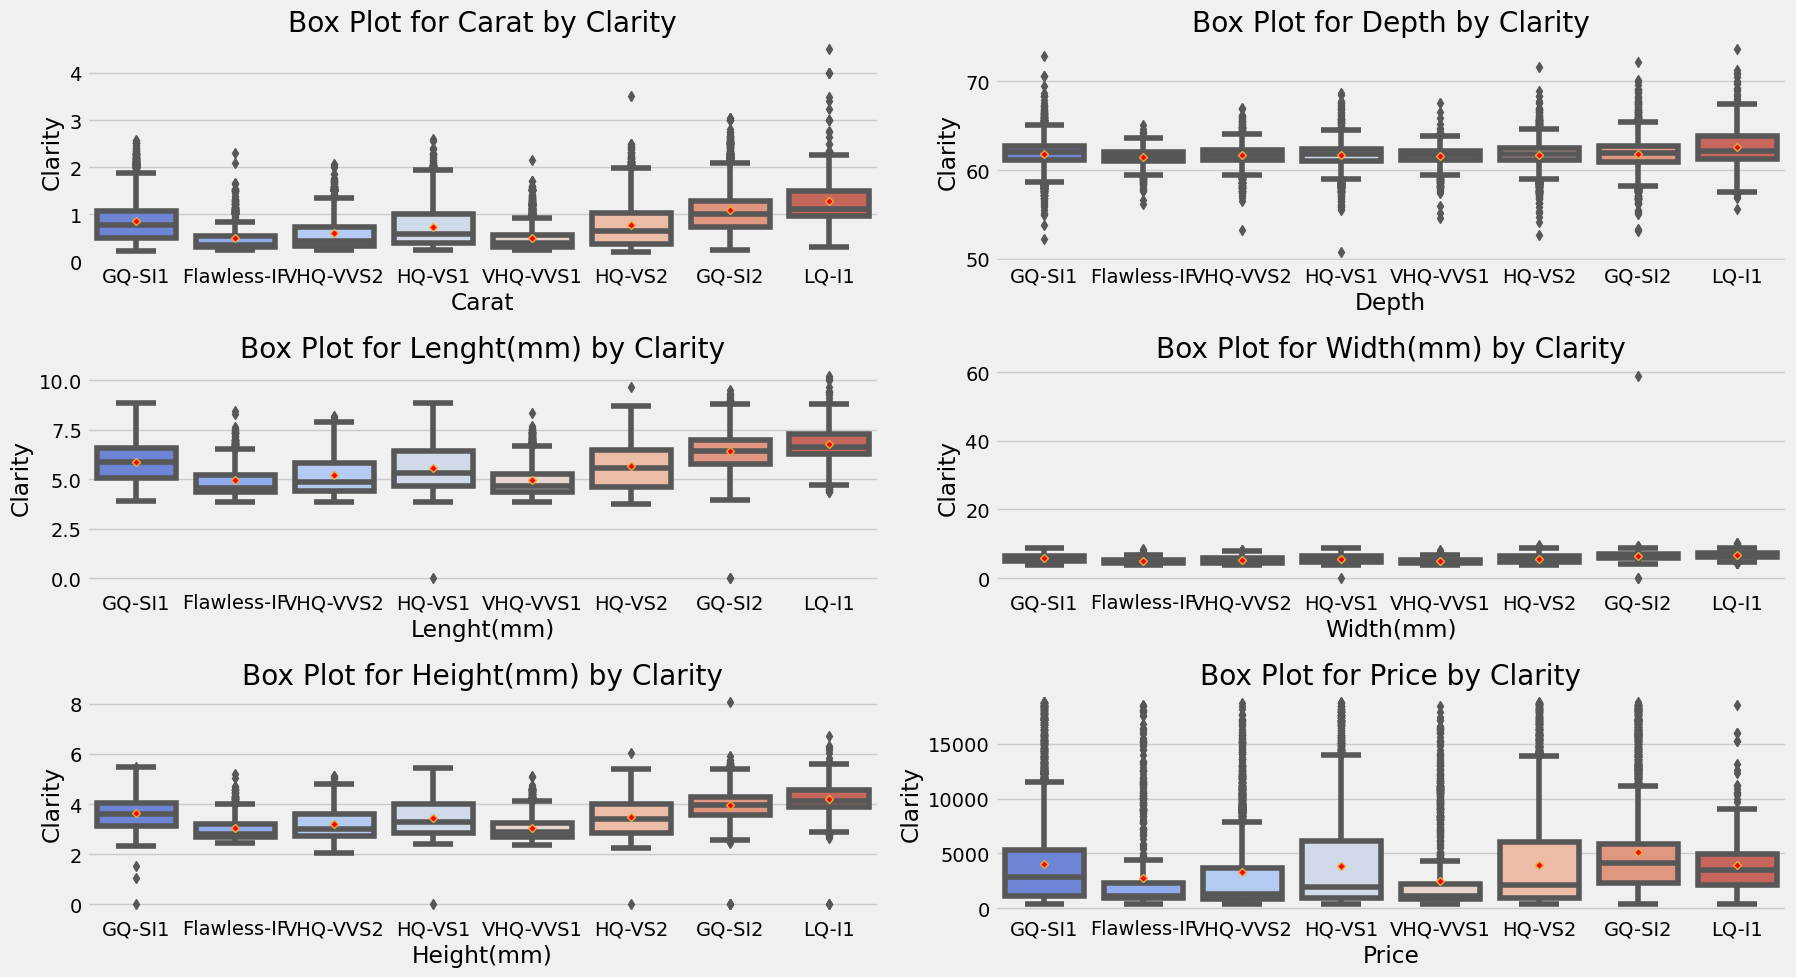

In [40]:
plt.figure(figsize=(18, 10))
features = ['Carat', 'Depth',  'Lenght(mm)', 'Width(mm)', 'Height(mm)',  'Price']
# Creating a box plot for each numerical variable with a hue based on sex
for i, variable in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=variable, x='Clarity', data=df, palette="coolwarm", orient='v',
                 showmeans=True, meanprops={"marker":"D", "markerfacecolor":"red", "markeredgewidth":1, "markersize":4})
    plt.title(f'Box Plot for {variable} by Clarity')
    plt.xlabel(variable)
    plt.ylabel('Clarity')

# Adjusting the layout for better readability
plt.tight_layout()
plt.show()


#### **Overview of Box Plot for Clarity vs num-variables**:
1. Carat:
- The carat weight increases as clarity decreases.
- Zircons with clarity grades like GQ-Sl1 and LQ-l1 tend to have higher carat values, whereas those with higher clarity grades (IF, VVS1) cluster at lower carat values.
2. Depth:
- Depth shows relatively consistent distributions across clarity grades, with overlapping interquartile ranges (IQRs).
- Median depth values are fairly similar, though outliers are present for certain clarity levels.
3. Lenght(mm):
- Crystals with lower clarity (LQ-l1, GQ-Sl2) tend to have higher lenght values (larger sizes).
- While higher clarity crytals have a smaller range of lenght values, indicating that they are typically smaller in length.
4. Width(mm):
- Similar to lenght, crystals with lower clarity (LQ-l1, GQ-Sl2) show a broader range of weight values.
- The majority of zircons with higher clarity have smaller widths.
5. Height(mm):
- Crystals with lower clarity grades show higher height values, similar to lenght and width.
- Higher clarity (IF, VVS1) have a narrower range of height values.
6. Price:
- Higher clarity grades (IF, VVS1) have narroer price range and their range is relatively tight.
- Lower clarity grades (GQ-Sl2, LQ-l1) have a wider price range, with some outliers reaching high price points likely due to size or carat weight.
7. General Observations:
- Clarity vs. Size (Carat, Lenght(mm), Width(mm), Height(mm)): zircons with lower clarity tend to be larger, while higher clarity crystals are smaller.
- Clarity vs. Price: Higher clarity crystals command higher prices on average, though there are exceptions.
- Outliers: All features outliers, indicating some zircons deviate significantly from typical trends in their respective clarity groups.

### **3-3-Outlier handling**

In [42]:
##check for outlier, upper and lower limit of outlier
# Calculating mean and standard deviation for each numerical feature
means = df.select_dtypes(include=[np.number]).mean()
stds = df.select_dtypes(include=[np.number]).std()

# Calculating the upper and lower bounds for each feature
lower_bounds = means - 3 * stds
upper_bounds = means + 3 * stds

# Identifying the outlier values for each feature
outlier_values = {column: df[(df[column] < lower_bounds[column]) | 
                                         (df[column] > upper_bounds[column])][column]
                  for column in df.select_dtypes(include=[np.number]).columns}

bounds = pd.DataFrame({'Lower Bound': lower_bounds, 'Upper Bound': upper_bounds})
outlier_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in outlier_values.items()]))


feature_columns = ['Lenght(mm)', 'Width(mm)', 'Height(mm)', 'Carat']
features_bounds = bounds.loc[feature_columns]

# Identifying the outlier values for the feature columns
feature_outlier_values = outlier_values_df[feature_columns]

# Displaying lower and upper bounds, and the actual outlier values 
features_bounds, feature_outlier_values

(            Lower Bound  Upper Bound
 Lenght(mm)     2.346723     9.111428
 Width(mm)      2.234595     9.231114
 Height(mm)     1.438864     5.634218
 Carat         -0.633584     2.229585,
        Lenght(mm)  Width(mm)  Height(mm)  Carat
 14            NaN        NaN         NaN    NaN
 62            NaN        NaN         NaN    NaN
 100           NaN        NaN         NaN    NaN
 102           NaN        NaN         NaN    NaN
 124           NaN        NaN         NaN   2.80
 ...           ...        ...         ...    ...
 26845         NaN        NaN         NaN   2.23
 26847         NaN        NaN         NaN    NaN
 26869        9.44        9.4        5.85   3.24
 26925         NaN        NaN         NaN    NaN
 26957         NaN        NaN         NaN    NaN
 
 [1162 rows x 4 columns])

## **Insights for outliers**
- Lenght(mm): the values below 2.34 and above 9.11 considered outliers.
- Width(mm): the values below 2.23 and above 9.23 considered outliers.
- Height(mm): the values below 1.43 and above 5.63 considered outliers.
- Carat: the values below -0.63 and above 2.22 considered outliers.
- Based on EDA , there isn't significant deviation in features and I decided to keep those data points.


## **4-data Wrangling**
   - ### **4-1-Data normalization**

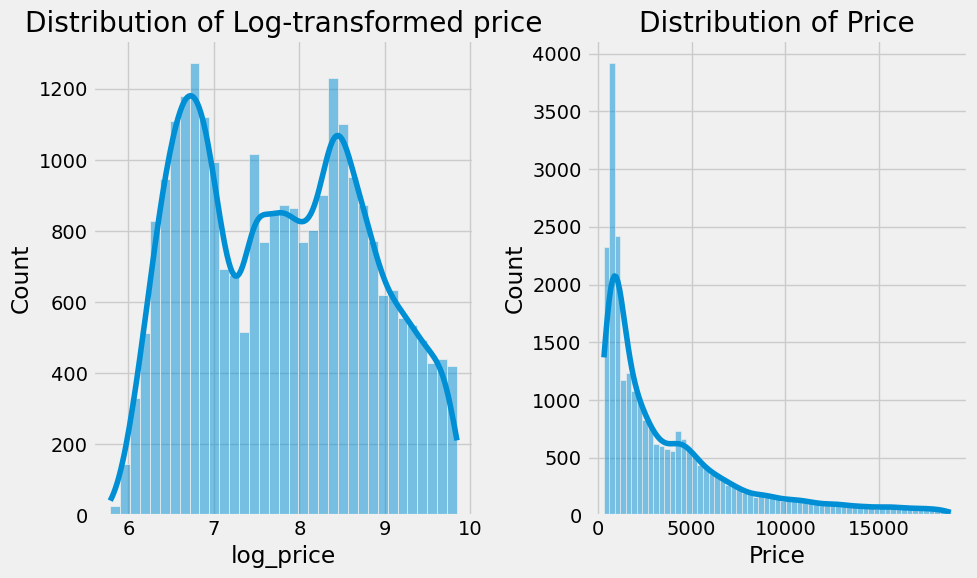

In [43]:
# Function to apply log transformation and data normalization
# Applying a logarithmic transformation to the target variable
df['log_price'] = np.log(df['Price'])

# Re-examine the distribution of the transformed target variable

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution of Log-transformed price')
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

### **4-2-Feature engineering(Encoding)**   
- Ordinal encoding was applied because the ranking of CUT, COLOR and CLARITY has impact on price of gemstone. 


In [44]:
df_encoded = df.copy()
df_encoded['Cut'] = df['Cut'].replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5})
df_encoded['Color'] = df['Color'].replace({'Best': 1,'Excellent':2, 'Fair':3, 'Good':4, 'Aevrage':5, 'Poor':6, 'Worst':7 })
df_encoded['Clarity'] = df['Clarity'].replace({'Flawless-FL': 1,'Flawless-IF':2, 'VHQ-VVS1':3, 'VHQ-VVS2':4, 'HQ-VS1':5, 
                                                'HQ-VS2':6, 'GQ-SI1':7, 'GQ-SI2':8,  'LQ-I1':9, 'LQ-I2':10, 'LQ-I3':11 })

In [45]:
df_encoded.head()

,Carat,Cut,Color,Clarity,Depth,Table,Lenght(mm),Width(mm),Height(mm),Price,log_price
0,0.30,5,2,7,62.1,58.0,4.27,4.29,2.66,499,6.212606
1,0.33,4,4,2,60.8,58.0,4.42,4.46,2.70,984,6.891626
2,0.90,3,2,4,62.2,60.0,6.04,6.12,3.78,6289,8.746557
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082,6.986566
4,0.31,5,3,3,60.4,59.0,4.35,4.43,2.65,779,6.658011


## **5-Modeling**

### **5-1-Linear Regression Modeling**

In [46]:
# Splitting the dataset into features and target variable

X = df_encoded.drop(['Price', 'log_price', 'Table', 'Depth'], axis=1)
y = df_encoded['log_price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print sizes of training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



# Initializing the model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Predict on the training set to check initial performance
y_train_pred = model.predict(X_train)

# Predicting the values for the testing data
y_pred_test = model.predict(X_test)

# Evaluating the model on test and train set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)



# Displaying the evaluation metrics and the first few rows of the results DataFrame on train set
print(f"\nTraining Set Performance:")
print(f'The Mean Average Error(MAE) is:{mae_train:.2f} ')
print(f'The Mean Square Error(MSE) is:{ mse_train:.2f} ')
print(f'The Root Mean Square Error(RMSE) is:{rmse_train:.2f} ')
print(f'The R\u00b2 is:{r2_train:.2f} ')




# Displaying the evaluation metrics and the first few rows of the results DataFrame on test set
print(f"\nTesting Set Performance:")
print(f'The Mean Average Error(MAE) is:{mae_test:.2f} ' )
print(f'The Mean Square Error(MSE) is: {mse_test:.2f}' )
print(f'The Root Mean Square Error(RMSE) is: {rmse_test:.2f}')
print(f'The R\u00b2 is: { r2_test:.2f}')




Training set size: (18386, 7)
Testing set size: (7880, 7)

Training Set Performance:
The Mean Average Error(MAE) is:0.12 
The Mean Square Error(MSE) is:0.03 
The Root Mean Square Error(RMSE) is:0.18 
The R² is:0.97 

Testing Set Performance:
The Mean Average Error(MAE) is:0.12 
The Mean Square Error(MSE) is: 0.05
The Root Mean Square Error(RMSE) is: 0.22
The R² is: 0.95


In [47]:
# Creating a DataFrame for actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
results_df.head(10)

,Actual,Predicted
19430,9.190444,9.005009
5654,9.601707,9.427560
23648,9.018938,9.064777
12909,9.337149,9.332589
15798,8.111928,8.140687
21953,9.505916,9.589797
22783,6.535241,6.604719
26031,7.559559,7.480061
10006,8.582044,8.518574
25884,8.402231,8.475339


In [48]:
# Convert the log-transformed predictions back to the original scale
results_df['Actual'] = np.exp(results_df['Actual'])
results_df['Predicted'] = np.exp(results_df['Predicted'])

# Display the DataFrame to compare actual and predicted values in their original scale
results_df.head(10)

,Actual,Predicted
19430,9803.0,8143.772056
5654,14790.0,12426.172758
23648,8258.0,8645.351132
12909,11352.0,11300.347904
15798,3334.0,3431.273935
21953,13439.0,14614.901218
22783,689.0,738.572238
26031,1919.0,1772.349176
10006,5335.0,5006.906933
25884,4457.0,4795.048814


### **5-2-Cross validation**

In [49]:

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Evaluate the model using cross-validation
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Cross-Validation R\u00b2 Scores: {cv_scores}")
print(f"Mean R\u00b2  Score: {mean_cv_score:.2f}")
print(f"Standard Deviation of R\u00b2 Scores: {std_cv_score:.2f}")

Cross-Validation R² Scores: [0.977089   0.97249623 0.93068911 0.97603096 0.97076263 0.97779758
 0.94637941 0.97727543 0.97567287 0.92303618]
Mean R²  Score: 0.96
Standard Deviation of R² Scores: 0.02


### **5-3-Tuning the model by GridSearchCV(regularization methods)**

In [52]:

# Hyperparameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize the models
models = {'lasso': Lasso(), 'ridge': Ridge()}

# Dictionary to store results for each model
results = {}

# Loop through each model and perform grid search
for name, model in models.items():
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Get the best model after grid search
    best_model = grid_search.best_estimator_
  
    # Predictions using the best model
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Evaluate the model
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        'best_alpha': grid_search.best_params_['alpha'],
        'train': {'rmse': rmse_train, 'mae': mae_train, 'r2': r2_train},
        'test': {'rmse': rmse_test, 'mae': mae_test, 'r2': r2_test}
    }

# Print the results for each model
for name, metrics in results.items():
    print(f"\n{name.capitalize()} Regression Model Performance:")
    print(f"Best Alpha: {metrics['best_alpha']}")
    print(f"\nTraining Set Performance:")
    print(f" RMSE: {metrics['train']['rmse']:.2f}")
    print(f" MAE: {metrics['train']['mae']:.2f}")
    print(f" R²: {metrics['train']['r2']:.2f}")
    
    print(f"\nTesting Set Performance:")
    print(f" RMSE: {metrics['test']['rmse']:.2f}")
    print(f" MAE: {metrics['test']['mae']:.2f}")
    print(f" R²: {metrics['test']['r2']:.2f}")




Lasso Regression Model Performance:
Best Alpha: 0.01

Training Set Performance:
 RMSE: 0.20
 MAE: 0.15
 R²: 0.96

Testing Set Performance:
 RMSE: 0.25
 MAE: 0.15
 R²: 0.94

Ridge Regression Model Performance:
Best Alpha: 1

Training Set Performance:
 RMSE: 0.18
 MAE: 0.12
 R²: 0.97

Testing Set Performance:
 RMSE: 0.22
 MAE: 0.13
 R²: 0.95


### The result for baseline model, Cross validation and GridSearchCV is shown below:

|Training set||Mean Average Error(MAE)|Mean Square Error(MSE)|Root Mean Square Error(RMSE)|R²|
|-----|--------|-------|--------- |------|---|
||Baseline Modeling|0.12|0.03|0.18|0.97||
||Cross Validation|  |  |     |  |
|          |GridSearchCV(Lasso)     |  0.15     |          |   0.20   | 0.96  | 
|          |GridSearchCV(Ridge)     |  0.12     |          |   0.18   | 0.97  | 
       



|Testing set||Mean Average Error(MAE)|Mean Square Error(MSE)|Root Mean Square Error(RMSE)|R²|
|----------|-----------------|-------|--------- |------|---|
|          |Baseline Modeling| 0.12      |  0.08        |   0.22   |  0.95 |   
|          |Cross Validation |       |          |      | 0.96  |
|          |GridSearchCV(Lasso)     |  0.15     |          |   0.25   | 0.94  | 
|          |GridSearchCV(Ridge)     |  0.13     |          |   0.22   | 0.95  |  

## **Conclusion**
 - Models predictions for baseline modeling and GridSearchCV method Ridge are same 95% and almost the same with Lasso method of GridSearchCV 94%.
 - Carat, Hiegth, Weigth, Length and Cut, Color and Clarity have impact to raise the Zircon gemstone price. 



## **Recommendation**
- Gemstone Co. Ltd. can achieve higher profits by focusing on the Carat, Length, Height, and Width measurements, as well as the Cut, Color, and Clarity of the Zircon stones, to standardize pricing and make it more competitive in the market.